# Part 1: Simulating the robot

In [12]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [13]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [14]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [15]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [16]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [17]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Saving values into a dataframe and plotting it 

In [33]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)

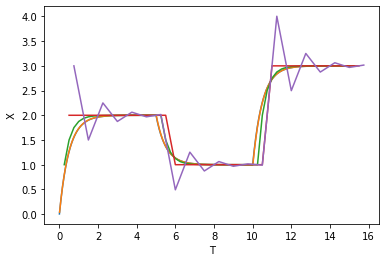

In [34]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [58]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)
_mean1 = stat.mean(x_array1)

std_dev = 0.0431
_mean = 0.5
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [59]:
random_vals = []
i = 0
it = 0
while i < len(x_array1):
 if(it==0):
    z1 = rand.uniform(0,2*np.pi) #values from 0 to (2*np.pi) our a#
    b = std_dev*np.sqrt(-2*math.log(rand.uniform(0,1)))
    z2 = b *(math.sin(z1))+_mean
    z3 = b*(math.cos(z1))+_mean
    noise = x_array1[i] + z2
    random_vals.append(noise)
    print("nose1: ",noise,x_array1[i])
    it = 1
    i = i + 1
 else:
    it = 0
    noise = x_array1[i] + z3
    random_vals.append(noise)  
    print("nose2: ",noise,x_array1[i])
    i = i + 1
    #print("nose2: ",noise,x_array[i])
        
#meu is mean sigma is std deviation

nose1:  0.5472225843368967 0.004
nose2:  0.4330932616019787 0.007991999999999999
nose1:  0.49968100181716724 0.011976015999999999
nose2:  0.5483933976009872 0.015952063968
nose1:  0.46693694042565725 0.019920159840063997
nose2:  0.5130633996168749 0.02388031952038387
nose1:  0.4406058781511895 0.027832558881343103
nose2:  0.5420463781557046 0.031776893763580415
nose1:  0.5153293974468629 0.035713339976053256
nose2:  0.5823508307557299 0.03964191329610115
nose1:  0.4923167115336354 0.04356262946950895
nose2:  0.5808344270221029 0.04747550421056993
nose1:  0.5866736174006861 0.05138055320214879
nose2:  0.5376966870026892 0.055277792095744495
nose1:  0.5389217353833388 0.059167236511553006
nose2:  0.5764055150199321 0.0630489020385299
nose1:  0.5544502502609853 0.06692280423445285
nose2:  0.5689740995140564 0.07078895862598394
nose1:  0.621124240648409 0.07464738070873198
nose2:  0.5303078281332649 0.07849808594731451
nose1:  0.5518665235489857 0.08234108977541989
nose2:  0.57754807238981

nose1:  2.0835575466833802 1.467502238282579
nose2:  2.0209253020572975 1.4685672338060138
nose1:  1.871078217366815 1.4696300993384017
nose2:  1.9841658463731093 1.4706908391397249
nose1:  1.9510835833701843 1.4717494574614454
nose2:  2.0025932762148306 1.4728059585465225
nose1:  1.9147481316558173 1.4738603466294296
nose2:  1.9952300313609341 1.4749126259361707
nose1:  1.9330036980773695 1.4759628006842984
nose2:  2.051931981319108 1.4770108750829298
nose1:  1.9079762355648984 1.478056853332764
nose2:  2.0173516014277535 1.4791007396260984
nose1:  1.9912132481173397 1.4801425381468463
nose2:  1.9803495834161742 1.4811822530705525
nose1:  1.9986400256991816 1.4822198885644113
nose2:  1.9971547184809704 1.4832554487872824
nose1:  1.926962923355536 1.484288937889708
nose2:  1.9792852671746997 1.4853203600139286
nose1:  1.9577524713847074 1.4863497192939008
nose2:  1.9735676898252188 1.487377019855313
nose1:  2.0814647195516924 1.4884022658156022
nose2:  1.9676647175987643 1.489425461283

nose2:  2.3197377658079734 1.8070244802481517
nose1:  2.3021400217067214 1.8074104312876553
nose2:  2.3094340841099097 1.80779561042508
nose1:  2.2814776274052657 1.8081800192042299
nose2:  2.266838475072567 1.8085636591658214
nose1:  2.3274567309066976 1.8089465318474898
nose2:  2.343159472665815 1.8093286387837948
nose1:  2.256108926836736 1.8097099815062272
nose2:  2.269805671883079 1.8100905615432148
nose1:  2.330940118086364 1.8104703804201283
nose2:  2.3243962593506557 1.810849439659288
nose1:  2.3331307406158914 1.8112277407799695
nose2:  2.311034447275538 1.8116052852984095
nose1:  2.3631500688147273 1.8119820747278126
nose2:  2.280111959268667 1.812358110578357
nose1:  2.2665473267365854 1.8127333943572004
nose2:  2.3372487003423705 1.813107927568486
nose1:  2.3492924246460585 1.813481711713349
nose2:  2.2715532200828235 1.8138547482899223
nose1:  2.422928825761983 1.8142270387933426
nose2:  2.305162209213658 1.814598584715756
nose1:  2.3022646348440183 1.8149693875463244
nose

nose2:  2.4369623826309232 1.9393326418423416
nose1:  2.3606793820454657 1.939453976558657
nose2:  2.4076886324420363 1.9395750686055395
nose1:  2.455896645897977 1.9396959184683285
nose2:  2.4437220667246202 1.9398165266313918
nose1:  2.398513997374613 1.939936893578129
nose2:  2.4930771681869355 1.9400570197909728
nose1:  2.4688046208671857 1.940176905751391
nose2:  2.4659884996625236 1.940296551939888
nose1:  2.4820145188993075 1.9404159588360084
nose2:  2.460161458911889 1.9405351269183364
nose1:  2.379564521566084 1.9406540566644996
nose2:  2.4700540564776508 1.9407727485511705
nose1:  2.395915425508195 1.9408912030540681
nose2:  2.449419184951003 1.94100942064796
nose1:  2.486900706604245 1.941127401806664
nose2:  2.4276706565284916 1.9412451470030507
nose1:  2.3514447173900095 1.9413626567090447
nose2:  2.46491659191853 1.9414799313956266
nose1:  2.4309076005312464 1.9415969715328354
nose2:  2.481036470286931 1.9417137775897697
nose1:  2.438282407486581 1.9418303500345901
nose2:

nose1:  2.4422194350854687 1.9842308105854123
nose2:  2.4465719916419766 1.9842623489642415
nose1:  2.4868870579030378 1.984293824266313
nose2:  2.400219332593248 1.9843252366177804
nose1:  2.4898538350208064 1.984356586144545
nose2:  2.4444661539103314 1.9843878729722557
nose1:  2.5429536252952967 1.9844190972263112
nose2:  2.465869377704462 1.9844502590318585
nose1:  2.4956475547715398 1.9844813585137948
nose2:  2.527189402465993 1.9845123957967672
nose1:  2.4321788123579475 1.9845433710051736
nose2:  2.4965965195091875 1.9845742842631633
nose1:  2.43537103224112 1.984605135694637
nose2:  2.512151600039224 1.9846359254232477
nose1:  2.5993730421696055 1.9846666535724014
nose2:  2.4922421458225354 1.9846973202652565
nose1:  2.476231637191775 1.9847279256247259
nose2:  2.490715601521504 1.9847584697734764
nose1:  2.3653372043510847 1.9847889528339293
nose2:  2.519441195642119 1.9848193749282614
nose1:  2.5002982830220413 1.984849736178405
nose2:  2.486327273798671 1.9848800367060482
no

nose1:  2.429550901945927 1.9952370824930035
nose2:  2.44165688729232 1.9952466083280174
nose1:  2.563041187922186 1.9952561151113613
nose2:  2.448596497631747 1.9952656028811386
nose1:  2.4452966299704615 1.9952750716753764
nose2:  2.4693899767370526 1.9952845215320256
nose1:  2.5072088364608573 1.9952939524889615
nose2:  2.5607938908536996 1.9953033645839835
nose1:  2.4804761713997605 1.9953127578548155
nose2:  2.454340040882217 1.995322132339106
nose1:  2.516890985410694 1.9953314880744277
nose2:  2.4783900471222475 1.995340825098279
nose1:  2.49395892497147 1.9953501434480823
nose2:  2.4915165178280336 1.995359443161186
nose1:  2.4982658407401495 1.9953687242748637
nose2:  2.4367140716244 1.995377986826314
nose1:  2.5012980270635907 1.9953872308526612
nose2:  2.4523781792260446 1.9953964563909559
nose1:  2.4477834587141714 1.995405663478174
nose2:  2.521638877350797 1.9954148521512176
nose1:  2.4891087384421775 1.995424022446915
nose2:  2.450203777516779 1.9954331744020213
nose1:  

nose1:  2.534074592796926 1.9987036421661515
nose2:  2.443426807098505 1.9987062348818192
nose1:  2.4816632584931195 1.9987088224120555
nose2:  2.5026168154782074 1.9987114047672314
nose1:  2.4947947452051586 1.998713981957697
nose2:  2.5631115029959592 1.9987165539937815
nose1:  2.4787462281349195 1.998719120885794
nose2:  2.4673867845958917 1.9987216826440224
nose1:  2.5771902762186953 1.9987242392787343
nose2:  2.5175150703685696 1.998726790800177
nose1:  2.582034838265785 1.9987293372185766
nose2:  2.469721677939896 1.9987318785441395
nose1:  2.5326431021329325 1.9987344147870512
nose2:  2.55064852039986 1.998736945957477
nose1:  2.5000495179803304 1.9987394720655622
nose2:  2.4880103419200243 1.9987419931214312
nose1:  2.5464188066291484 1.9987445091351883
nose2:  2.466424792534754 1.998747020116918
nose1:  2.4709899172679286 1.998749526076684
nose2:  2.5185641047148177 1.9987520270245307
nose1:  2.5568091685931984 1.9987545229704817
nose2:  2.5514324110554973 1.9987570139245407
n

nose2:  2.509116234199446 1.999658967369326
nose1:  2.577658615354203 1.9996596494345873
nose2:  2.433525010589005 1.999660330135718
nose1:  2.470948757534673 1.9996610094754466
nose2:  2.412189646177825 1.9996616874564956
nose1:  2.5220150882703756 1.9996623640815827
nose2:  2.5452850255547976 1.9996630393534196
nose1:  2.415764525025465 1.9996637132747128
nose2:  2.5508305074806747 1.9996643858481633
nose1:  2.5853656289721743 1.999665057076467
nose2:  2.5543096672500605 1.999665726962314
nose1:  2.5085306793526176 1.9996663955083893
nose2:  2.4988122099009757 1.9996670627173725
nose1:  2.486106590788168 1.9996677285919378
nose2:  2.501102989819797 1.9996683931347539
nose1:  2.494491562081306 1.9996690563484845
nose2:  2.515665837311749 1.9996697182357874
nose1:  2.475566317862426 1.9996703787993158
nose2:  2.520847157685451 1.999671038041717
nose1:  2.424211452615666 1.9996716959656335
nose2:  2.4987592533506016 1.9996723525737023
nose1:  2.5623624986860274 1.999673007868555
nose2: 

nose1:  2.5023062629430615 1.9979102846049548
nose2:  2.5060676509639324 1.995914464035745
nose1:  2.458933274754852 1.9939226351076733
nose2:  2.5072905142162023 1.991934789837458
nose1:  2.5606458131377665 1.989950920257783
nose2:  2.484535117715749 1.9879710184172674
nose1:  2.4817295031658118 1.9859950763804328
nose2:  2.5271233176560344 1.984023086227672
nose1:  2.51236056348358 1.9820550400552166
nose2:  2.4471243089064125 1.9800909299751062
nose1:  2.496139344595238 1.978130748115156
nose2:  2.4073729313987533 1.9761744866189257
nose1:  2.5188699797912277 1.9742221376456879
nose2:  2.465450179636984 1.9722736933703966
nose1:  2.5080542405815778 1.9703291459836558
nose2:  2.4035284874336873 1.9683884876916886
nose1:  2.516780238829132 1.9664517107163053
nose2:  2.517498756400525 1.9645188072948727
nose1:  2.4703255681392267 1.962589769680283
nose2:  2.4075230171588995 1.9606645901409223
nose1:  2.432576518569276 1.9587432609606406
nose2:  2.443890209022489 1.9568257744387192
nose

nose2:  1.749579976238335 1.2394238645266717
nose1:  1.6870452233719595 1.2389450167976184
nose2:  1.7591797680389285 1.238467126764023
nose1:  1.6953907111472162 1.237990192510495
nose2:  1.8010181054987155 1.237514212125474
nose1:  1.680014639406721 1.2370391837012231
nose2:  1.7199656463812052 1.2365651053338207
nose1:  1.6754915274360007 1.236091975123153
nose2:  1.7026384157465337 1.2356197911729065
nose1:  1.6999338698234026 1.2351485515905607
nose2:  1.6996492487877732 1.2346782544873796
nose1:  1.795633162793963 1.2342088979784047
nose2:  1.7462425400135198 1.2337404801824479
nose1:  1.7375678497936389 1.233272999222083
nose2:  1.6793753468471662 1.232806453223639
nose1:  1.7572289280512794 1.2323408403171916
nose2:  1.7232020471273746 1.2318761586365572
nose1:  1.7486021669630254 1.2314124063192842
nose2:  1.6509244887732608 1.2309495815066456
nose1:  1.8142393675346251 1.2304876823436324
nose2:  1.6932500144762874 1.230026706978945
nose1:  1.6902988635424907 1.229566653564987

nose1:  1.6237887700111648 1.0693381888276168
nose2:  1.4706533401856527 1.0691995124499616
nose1:  1.5553145903035446 1.0690611134250616
nose2:  1.593676057064632 1.0689229911982114
nose1:  1.601053020934165 1.068785145215815
nose2:  1.562287546246838 1.0686475749253834
nose1:  1.6168156302271952 1.0685102797755326
nose2:  1.5406390335148608 1.0683732592159816
nose1:  1.6262251013521478 1.0682365126975497
nose2:  1.5603328792931048 1.0681000396721547
nose1:  1.540457470371769 1.0679638395928104
nose2:  1.6195918717619928 1.0678279119136247
nose1:  1.699571121999822 1.0676922560897975
nose2:  1.565304740768633 1.0675568715776178
nose1:  1.5307692774864394 1.0674217578344625
nose2:  1.5646067223858486 1.0672869143187935
nose1:  1.5945369883579916 1.067152340490156
nose2:  1.5736422684761342 1.0670180358091756
nose1:  1.5892744300988455 1.0668839997375572
nose2:  1.666488701705139 1.0667502317380821
nose1:  1.586177178329852 1.066616731274606
nose2:  1.529597201678026 1.0664834978120568


nose2:  1.5268768639933872 1.0182407853175526
nose1:  1.5011835411876244 1.0182043037469175
nose2:  1.5509152729770554 1.0181678951394237
nose1:  1.5522173835077098 1.018131559349145
nose2:  1.4197776736875287 1.0180952962304466
nose1:  1.5474980949176957 1.0180591056379857
nose2:  1.484090000829985 1.0180229874267097
nose1:  1.4500233341889222 1.0179869414518563
nose2:  1.541512472717696 1.0179509675689526
nose1:  1.5132711929686335 1.0179150656338147
nose2:  1.5290996370088454 1.017879235502547
nose1:  1.5628294762404253 1.0178434770315419
nose2:  1.4771680656290083 1.017807790077479
nose1:  1.5936552284433707 1.017772174497324
nose2:  1.4729680542219976 1.0177366301483295
nose1:  1.470572704208082 1.0177011568880328
nose2:  1.593219585039015 1.0176657545742567
nose1:  1.5510386071557343 1.017630423065108
nose2:  1.4674849314491363 1.0175951622189778
nose1:  1.5107030499812708 1.0175599718945398
nose2:  1.4355352601675682 1.0175248519507507
nose1:  1.4625114891954154 1.01748980224684

nose2:  1.5123228900409704 1.0048082166654229
nose1:  1.5256808630505054 1.004798600232092
nose2:  1.5629421647127235 1.004789003031628
nose1:  1.4833483360457778 1.0047794250255648
nose2:  1.4964523310269078 1.0047698661755138
nose1:  1.5027298016039756 1.0047603264431628
nose2:  1.468873807216485 1.0047508057902765
nose1:  1.5273118371843568 1.004741304178696
nose2:  1.4723467982140692 1.0047318215703385
nose1:  1.5056708830703398 1.0047223579271978
nose2:  1.5681593406332919 1.0047129132113435
nose1:  1.5025160170148526 1.0047034873849208
nose2:  1.5313412196096272 1.004694080410151
nose1:  1.4846858260674165 1.0046846922493307
nose2:  1.4693316504371974 1.004675322864832
nose1:  1.515740048521681 1.0046659722191023
nose2:  1.505977107392685 1.004656640274664
nose1:  1.4457097692539351 1.0046473269941145
nose2:  1.5776781351629892 1.0046380323401263
nose1:  1.5057682880265557 1.0046287562754461
nose2:  1.530466581400144 1.0046194987628951
nose1:  1.4710671246196594 1.004610259765369

nose2:  1.5133178998979453 1.001179299224982
nose1:  1.52795289293391 1.001176940626532
nose2:  1.492037622834212 1.001174586745279
nose1:  1.4569133567834567 1.0011722375717884
nose2:  1.506536333819728 1.0011698930966448
nose1:  1.5557380207273148 1.0011675533104516
nose2:  1.507340098937267 1.0011652182038306
nose1:  1.4744271424451527 1.001162887767423
nose2:  1.4376991094020815 1.0011605619918882
nose1:  1.478909068117008 1.0011582408679045
nose2:  1.4058591857091836 1.0011559243861687
nose1:  1.5327036036642396 1.0011536125373963
nose2:  1.5523428253523786 1.0011513053123215
nose1:  1.5167506363964878 1.001149002701697
nose2:  1.4899361025800546 1.0011467046962936
nose1:  1.4498056655015539 1.001144411286901
nose2:  1.5149109158062424 1.0011421224643273
nose1:  1.4732862516721357 1.0011398382193986
nose2:  1.5710047996419811 1.0011375585429598
nose1:  1.5016498920561905 1.001135283425874
nose2:  1.4223499605469487 1.0011330128590223
nose1:  1.5623450184818735 1.0011307468333044
n

nose1:  1.4544481441359227 1.0002968704427155
nose2:  1.5441563415979918 1.0002962767018302
nose1:  1.4960552973546124 1.0002956841484265
nose2:  1.5010088266184518 1.0002950927801297
nose1:  1.4536226149280573 1.0002945025945695
nose2:  1.5331773018075807 1.0002939135893805
nose1:  1.4777424488823048 1.0002933257622018
nose2:  1.5491511837945375 1.0002927391106773
nose1:  1.4797104963231211 1.0002921536324558
nose2:  1.4678742503171693 1.0002915693251908
nose1:  1.495587200879119 1.0002909861865403
nose2:  1.4922063824774605 1.0002904042141672
nose1:  1.4604974956228831 1.000289823405739
nose2:  1.502410964548972 1.0002892437589275
nose1:  1.486181310800752 1.0002886652714096
nose2:  1.496329793196495 1.0002880879408667
nose1:  1.5563655351198604 1.000287511764985
nose2:  1.4806631938918764 1.000286936741455
nose1:  1.5128169116270298 1.0002863628679721
nose2:  1.4894277733361823 1.0002857901422362
nose1:  1.5510109109074819 1.0002852185619517
nose2:  1.4829244186186106 1.000284648124

nose2:  1.532472134600135 1.0000822704599521
nose1:  1.558910201090173 1.0000821059190321
nose2:  1.545798198661949 1.000081941707194
nose1:  1.4577467832909174 1.0000817778237796
nose2:  1.4468598665977999 1.0000816142681321
nose1:  1.4370109846323043 1.000081451039596
nose2:  1.460227382565945 1.0000812881375167
nose1:  1.5261239564751778 1.0000811255612416
nose2:  1.542966037726538 1.000080963310119
nose1:  1.4621071909419363 1.0000808013834988
nose2:  1.5264675407265766 1.0000806397807318
nose1:  1.4216918873296143 1.0000804785011703
nose2:  1.51937923387585 1.000080317544168
nose1:  1.5003062310396014 1.0000801569090796
nose2:  1.588796847975887 1.0000799965952614
nose1:  1.4630990612473025 1.000079836602071
nose2:  1.4996910556778194 1.0000796769288667
nose1:  1.4372758336934641 1.000079517575009
nose2:  1.474489761983254 1.000079358539859
nose1:  1.557729993925279 1.0000791998227794
nose2:  1.4485815301704608 1.0000790414231338
nose1:  1.4487785112216658 1.0000788833402874
nose2

nose1:  2.5925531194984552 2.1092436319874834
nose2:  2.6787288220067094 2.1110251447235084
nose1:  2.6099308408963053 2.1128030944340614
nose2:  2.5863271172438087 2.1145774882451933
nose1:  2.620194650410209 2.1163483332687028
nose2:  2.593556173768558 2.118115636602165
nose1:  2.585516594152892 2.1198794053289607
nose2:  2.5891041109668667 2.121639646518303
nose1:  2.6936883341796354 2.1233963672252663
nose2:  2.6567384584904135 2.1251495744908158
nose1:  2.592580737078243 2.126899275341834
nose2:  2.7408378146053445 2.1286454767911502
nose1:  2.6457799575293377 2.130388185837568
nose2:  2.577284093275493 2.132127409465893
nose1:  2.6568242310059453 2.133863154646961
nose2:  2.678559469157498 2.135595428337667
nose1:  2.5761098343569437 2.1373242374809918
nose2:  2.6174885032399757 2.1390495890060297
nose1:  2.6567997506595487 2.1407714898280177
nose2:  2.671051761065966 2.142489946848362
nose1:  2.6790681458831354 2.144204966954665
nose2:  2.660633415354532 2.1459165570207555
nose1

nose2:  3.3006538795970926 2.7766618237750618
nose1:  3.2737534497006036 2.7771085001275115
nose2:  3.285115623225761 2.7775542831272566
nose1:  3.227578737843186 2.777999174561002
nose2:  3.256953373545445 2.77844317621188
nose1:  3.2920891801279764 2.7788862898594564
nose2:  3.236848125236322 2.7793285172797373
nose1:  3.2640209966999514 2.7797698602451777
nose2:  3.294974052728648 2.7802103205246875
nose1:  3.1803002108099223 2.780649899883638
nose2:  3.267713331582837 2.781088600083871
nose1:  3.332157161861576 2.781526422883703
nose2:  3.345842013694576 2.7819633700379356
nose1:  3.320258160712612 2.7823994432978596
nose2:  3.299185627877576 2.7828346444112637
nose1:  3.309972963222921 2.783268975122441
nose2:  3.3296943558816876 2.783702437172196
nose1:  3.289780057392225 2.7841350322978515
nose2:  3.3016972446849575 2.784566762233256
nose1:  3.266127416029326 2.7849976287087896
nose2:  3.3886375114823926 2.785427633451372
nose1:  3.2808110964448716 2.785856778184469
nose2:  3.32

nose2:  3.4029867112251466 2.941128722132562
nose1:  3.411119685213891 2.941246464688297
nose2:  3.4516891264568166 2.9413639717589204
nose1:  3.432919282874037 2.9414812438154025
nose2:  3.4579930465019793 2.9415982813277717
nose1:  3.4773791891706187 2.941715084765116
nose2:  3.3230219640072547 2.941831654595586
nose1:  3.42876600390446 2.9419479912863946
nose2:  3.4960256948863666 2.942064095303822
nose1:  3.5224897229874808 2.9421799671132143
nose2:  3.442317442458963 2.9422956071789876
nose1:  3.453520441465624 2.9424110159646295
nose2:  3.3815991713973332 2.9425261939327
nose1:  3.4828048779734746 2.9426411415448346
nose2:  3.410212520500545 2.942755859261745
nose1:  3.3994313528797293 2.9428703475432214
nose2:  3.382686580922212 2.942984606848135
nose1:  3.421945472331065 2.9430986376344386
nose2:  3.4333499625584327 2.9432124403591695
nose1:  3.5119819290858003 2.9433260154784513
nose2:  3.4992710665815374 2.9434393634474945
nose1:  3.420459306745261 2.9435524847205996
nose2:  

nose1:  3.5821267154702743 2.985000970405144
nose2:  3.496585764360744 2.9850309684643337
nose1:  3.508459918968918 2.985060906527405
nose2:  3.4985036921006394 2.98509078471435
nose1:  3.5367004159994573 2.9851206031449213
nose2:  3.473777933284164 2.9851503619386315
nose1:  3.529036439917723 2.9851800612147543
nose2:  3.401904642604259 2.985209701092325
nose1:  3.5233961254358075 2.98523928169014
nose2:  3.540365771254505 2.98526880312676
nose1:  3.5124243654409963 2.9852982655205063
nose2:  3.480002659909976 2.9853276689894654
nose1:  3.439407159459194 2.9853570136514866
nose2:  3.568153637665102 2.985386299624184
nose1:  3.4950838702774862 2.9854155270249354
nose2:  3.3824073728690363 2.9854446959708856
nose1:  3.531537390415254 2.985473806578944
nose2:  3.4937144722115114 2.985502858965786
nose1:  3.523925898901052 2.9855318532478545
nose2:  3.454307642180243 2.985560789541359
nose1:  3.4507246606551685 2.985589667962276
nose2:  3.4734714066340695 2.9856184886263515
nose1:  3.4849

nose1:  3.4136203376683887 2.9945316541902716
nose2:  3.4726978217880866 2.994542590881891
nose1:  3.4264911398297744 2.9945535057001273
nose2:  3.4470882302009707 2.994564398688727
nose1:  3.446222272141652 2.9945752698913495
nose2:  3.45780576898994 2.994586119351567
nose1:  3.5292083044517435 2.9945969471128637
nose2:  3.411469092736234 2.994607753218638
nose1:  3.5282747510865784 2.9946185377122005
nose2:  3.4684594506219373 2.994629300636776
nose1:  3.4217661947864233 2.9946400420355026
nose2:  3.5266759946679054 2.9946507619514318
nose1:  3.4663572548428725 2.994661460427529
nose2:  3.481957878405294 2.9946721375066736
nose1:  3.4902309965055527 2.9946827932316604
nose2:  3.47668318485452 2.9946934276451973
nose1:  3.4488052481841645 2.994704040789907
nose2:  3.4905377436880265 2.994714632708327
nose1:  3.4697466838599302 2.9947252034429104
nose2:  3.4663836392211143 2.9947357530360246
nose1:  3.450167769392935 2.9947462815299524
nose2:  3.5229525970454594 2.9947567889668925
nose

nose2:  3.5322558841363563 2.9985955913199174
nose1:  3.5753349504278336 2.9985984001372774
nose2:  3.529397331564239 2.9986012033370026
nose1:  3.4836814186487883 2.9986040009303285
nose2:  3.485687188184878 2.998606792928468
nose1:  3.532894279146586 2.998609579342611
nose2:  3.534349643337761 2.998612360183926
nose1:  3.4956835065799927 2.998615135463558
nose2:  3.5696074883675273 2.998617905192631
nose1:  3.462713678656997 2.9986206693822455
nose2:  3.453752447126762 2.998623428043481
nose1:  3.547123067637593 2.9986261811873938
nose2:  3.4704464854588823 2.998628928825019
nose1:  3.4985803306398893 2.9986316709673693
nose2:  3.5271905035630944 2.9986344076254343
nose1:  3.482324888997236 2.9986371388101833
nose2:  3.4752806570206998 2.998639864532563
nose1:  3.4867941289878117 2.998642584803498
nose2:  3.45550287182429 2.998645299633891
nose1:  3.4689445987844922 2.998648009034623
nose2:  3.4492984925786763 2.998650713016554
nose1:  3.455111716432327 2.998653411590521
nose2:  3.40

nose2:  3.480861870133829 2.999431804006736
nose1:  3.527082551741999 2.9994329403987225
nose2:  3.5056065381539794 2.999434074517925
nose1:  3.432376000411212 2.999435206368889
nose2:  3.488651886361499 2.9994363359561516
nose1:  3.4099104105571705 2.9994374632842393
nose2:  3.460630048150297 2.9994385883576706
nose1:  3.4489258923886084 2.999439711180955
nose2:  3.5330583208305146 2.9994408317585934
nose1:  3.4784558876245115 2.9994419500950764
nose2:  3.491642822423245 2.9994430661948863
nose1:  3.4765455417279494 2.9994441800624965
nose2:  3.503566179992093 2.9994452917023713
nose1:  3.5344201205429115 2.9994464011189663
nose2:  3.469456717091036 2.9994475083167282
nose1:  3.462498339695652 2.999448613300095
nose2:  3.5238660725722215 2.9994497160734945
nose1:  3.49603827450247 2.9994508166413474
nose2:  3.535808516560931 2.9994519150080645
nose1:  3.459754406415162 2.999453011178048
nose2:  3.5154284160651814 2.999454105155692
nose1:  3.53032569730158 2.9994551969453807
nose2:  3.

nose1:  3.512519921374981 2.999873661803285
nose2:  3.511054169537113 2.9998739144796787
nose1:  3.4962735543240058 2.999874166650719
nose2:  3.4661369087111464 2.9998744183174177
nose1:  3.4865638000620773 2.999874669480783
nose2:  3.490168405036654 2.9998749201418216
nose1:  3.482260748466309 2.999875170301538
nose2:  3.4647647448757484 2.9998754199609348
nose1:  3.5397493497289445 2.999875669121013
nose2:  3.455108357460784 2.999875917782771
nose1:  3.5735159921673114 2.9998761659472053
nose2:  3.4878315904342196 2.999876413615311
nose1:  3.4574852967602463 2.9998766607880802
nose2:  3.5200123949005033 2.999876907466504
nose1:  3.529093994678893 2.999877153651571
nose2:  3.4828119281363628 2.999877399344268
nose1:  3.4856968895447347 2.9998776445455793
nose2:  3.4824528837289495 2.999877889256488
nose1:  3.5006322023863228 2.999878133477975
nose2:  3.5420133119189776 2.999878377211019
nose1:  3.4600511683820367 2.999878620456597
nose2:  3.518372968797199 2.9998788632156836
nose1:  3

## Noise plot

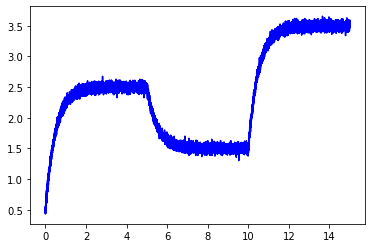

In [60]:
y = random_vals
x = t_array1
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

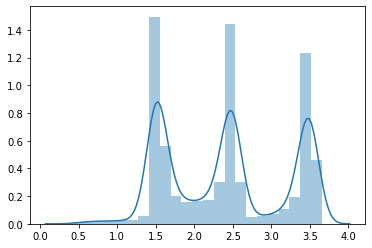

In [61]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

In [62]:
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)
  return sigmoid

def predict_step(noise1,weights1):
    activation1 = 1
    activation1 +=weights1*noise1
    print(activation1)
    return 1.0 if activation1 >= 0.8 else 0.0

def predict(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    net_sum += weights2[1]*noise2
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum

def train_weights(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        sum_error = 0.0
        for a in array:
            prediction, netwrk_sum = predict(a,weights3)
            Target = a
            delta = Target - prediction
            error = delta
            net_array.append(prediction)
            #weights3[0] = weights3[0] + lr * delta * a #bias
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            #print("Target",Target)
            #weights3[1] = weights3[1] + lr * delta * a #weight
            weights3_change= -lr*Target*error
            weights3[1] = weights3[1] + weights3_change
            #print("weight",weights3[1])
            sum_error += error**2
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, sum_error))
    return net_array

## Train network

In [66]:
values = train_weights(random_vals, 0.006531,1)

>epoch=0, lrate=0.007, error=146.710


In [67]:
len(values)

15001

## Network prediction(blue) against noise values(yellow)

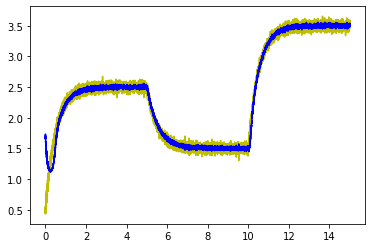

In [69]:
y_axis = values #network output
y = random_vals
x_axis = x = t_array1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()